# HMM Прогнозирование

In [1]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

# Модели временных рядов с переключениями

In [3]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

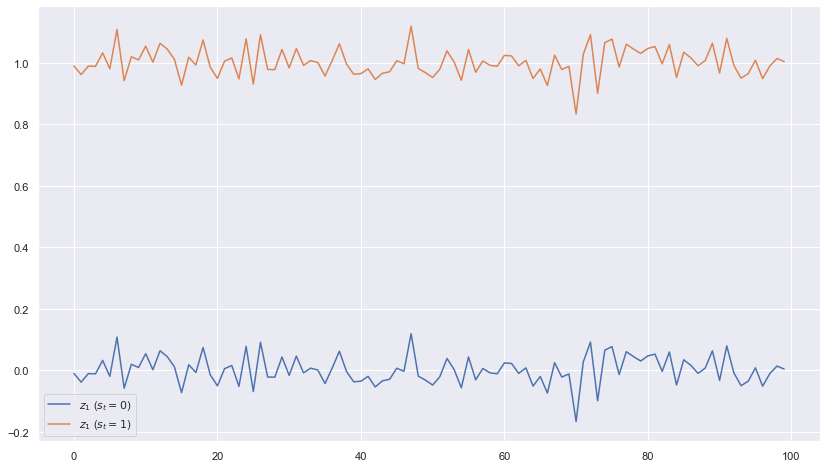

In [4]:
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

In [5]:

z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

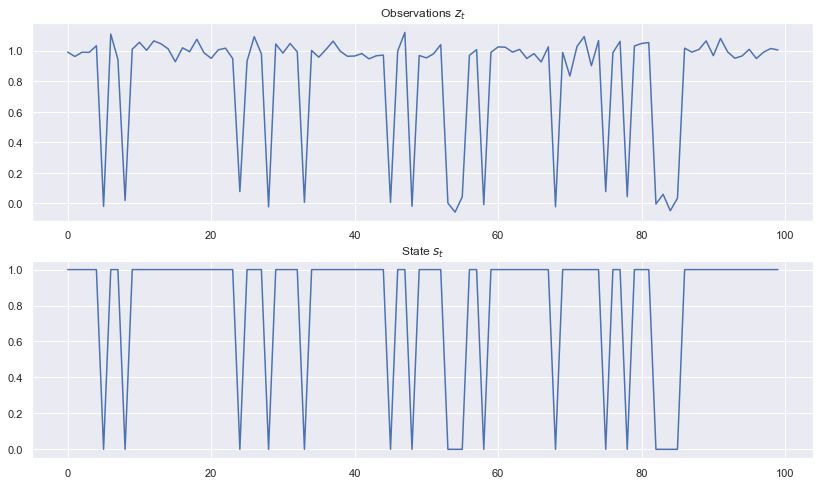

In [6]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Как генерация траектории модели с марковскими переключениями

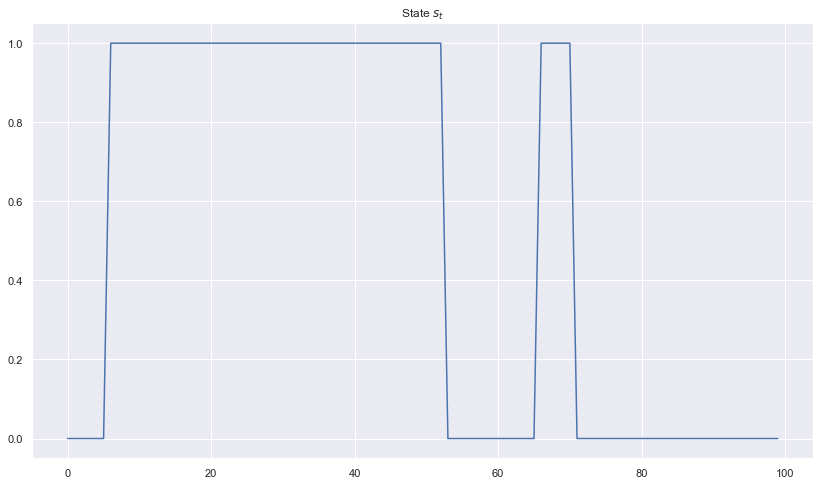

In [7]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [8]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

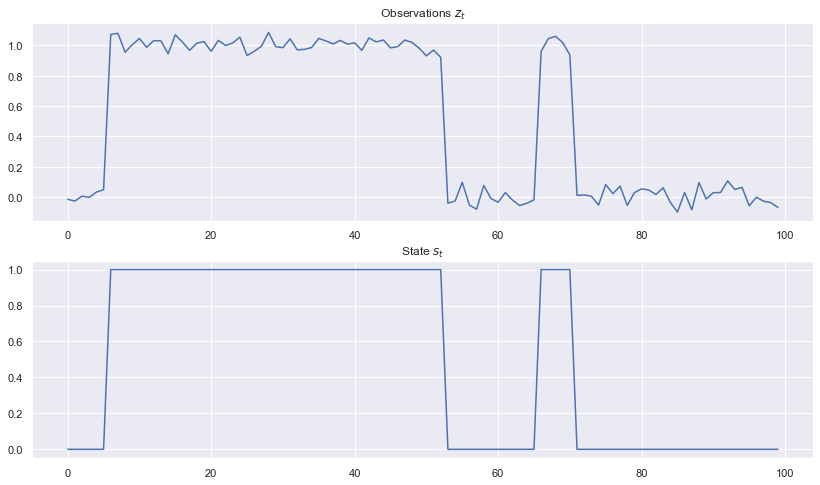

In [9]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Ггенерирация траектории со скрытой марковской модели

In [10]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


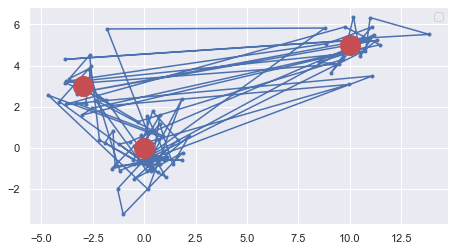

In [11]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

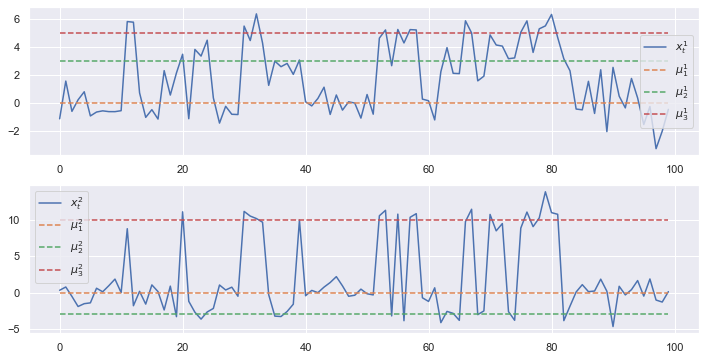

In [12]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [13]:
from hmmlearn.hmm import GaussianHMM

In [17]:
series = pd.read_csv("DUQ_hourly.csv")["DUQ_MW"]

In [18]:
series

0         1458.0
1         1377.0
2         1351.0
3         1336.0
4         1356.0
5         1372.0
6         1402.0
7         1425.0
8         1502.0
9         1556.0
10        1603.0
11        1615.0
12        1617.0
13        1630.0
14        1619.0
15        1613.0
16        1683.0
17        1764.0
18        1786.0
19        1737.0
20        1726.0
21        1669.0
22        1592.0
23        1493.0
24        1484.0
25        1419.0
26        1378.0
27        1359.0
28        1375.0
29        1437.0
           ...  
119038    2096.0
119039    2070.0
119040    2048.0
119041    1988.0
119042    1889.0
119043    1781.0
119044    1704.0
119045    1663.0
119046    1633.0
119047    1619.0
119048    1623.0
119049    1649.0
119050    1675.0
119051    1682.0
119052    1698.0
119053    1731.0
119054    1743.0
119055    1764.0
119056    1784.0
119057    1803.0
119058    1811.0
119059    1828.0
119060    1858.0
119061    1960.0
119062    1968.0
119063    1962.0
119064    1940.0
119065    1891

In [19]:
values = series.values.reshape(-1,1)

In [20]:
values

array([[1458.],
       [1377.],
       [1351.],
       ...,
       [1891.],
       [1820.],
       [1721.]])

In [24]:
for n in range(1, 7):
    model = GaussianHMM(n_components=n,
                        
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -848776.4967285757
2 -805638.2251342098
3 -771856.8639680708
4 -751347.3519417476
5 -735193.0792687393
6 -724393.8412550663


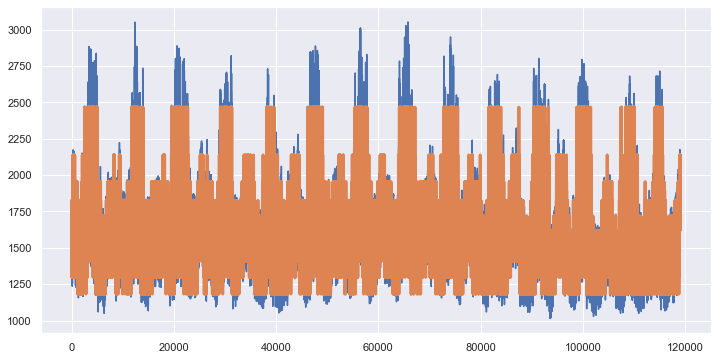

In [25]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [26]:
model.transmat_.shape

(10, 10)

In [27]:
print(model.transmat_)

[[5.82322565e-001 8.12651247e-005 2.96439388e-323 5.71288638e-003
  3.82147680e-004 2.52117551e-001 1.54906304e-001 0.00000000e+000
  4.47728093e-003 8.64122056e-020]
 [5.65878483e-003 6.12627857e-001 6.59671499e-005 2.85004648e-005
  1.75503505e-001 1.50119926e-002 1.04734133e-003 0.00000000e+000
  1.88457218e-001 1.59883356e-003]
 [1.90876079e-003 5.06361085e-003 7.15280065e-001 0.00000000e+000
  4.32565601e-003 9.45423863e-004 2.16442335e-062 9.50508405e-002
  5.22042077e-003 1.72205222e-001]
 [1.12514728e-072 0.00000000e+000 0.00000000e+000 8.00351869e-001
  0.00000000e+000 0.00000000e+000 1.99648131e-001 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.52187522e-003 1.82409424e-001 4.49203452e-020 1.88866084e-004
  6.28696878e-001 3.86239305e-003 9.82067323e-004 0.00000000e+000
  1.82014880e-002 1.61137009e-001]
 [1.83559758e-001 1.35256991e-002 2.64085045e-127 2.14385721e-003
  4.18482436e-006 5.62619509e-001 1.01706585e-002 0.00000000e+000
  2.27845862e-001 1.30471587e-004